on 25th September, 2021 ~ Saturday_4

## Module-1: **K-Nearest Neighbors** _--- A Supervised Learning algorithm_

![](resources/KNN-Intro.png)

<ul>
    <li>Its <b>Non-Parametric</b>
<blockquote> i.e., (Recall the idea of applying <i>Linear Regression, Multiple Regression...</i>, there we derive some parameters <i>[informally.. ""a function""]</i> from the training data, and later when proposed a new test_data, those are plugged into those parameters and calculated).
<p style="text-align: right"> <i>-----------------------That's called the <b>Parametric Method</b></i></p>
Here interestingly.. we don't use any such parameters. -- Hence called <b>Non-Parametric Method..</b>
   </blockquote>
   
   Then what about telling that <b>KNN with 4,5,..8 neighbors..??</b> aren't we using any parameter there..??<br/>
   <blockquote>
       Its a <b>subtle difference</b>. That's the <b>tuning parameter</b> -- <i>In the sense that... these parameters are <u>for tuning the model</u>, and moreover, like the Linear Regression models, those parameters are <u>derived from the given data itself..</u></i>
    </blockquote>
  </li>
    
 <li> Its a <b>Lazy Learning algorithm</b>
 <blockquote>
     Say for the Logistic regression.. in order to go for prediction, need to derive the parameters, then can go for prediction.<br/>
     Whereas here... just give the training-dataset and test-point -- it'll classify. <u>But, a lot of work has to be done earlier to that</u>
 </blockquote>
 </li>
</ul>

![](resources/Why-KNN.png)
![](resources/KNN_input_and_output.svg)
![](resources/assumptions-knn.png)
![](resources/kNN-Algorithm.png) <br/>
> Based on the level of proximity for a point, a class is chosen (like $C_1, C_2,....c_n$). <br/>
<u>If a point comes in more than one class</u> **Majority voting** is done.

![](resources/knn-illustration.svg)
![](resources/knn-illustration_testing.svg)

![](resources/kNN-things_to_consider.svg)
![](resources/kNN-parameter_selection.png)
![](resources/feature_selection_and_scaling.png)

## Module-2: **Implementing KNN in R**

Agenda:<br/>
![](resources/agenda.png)<hr/>
Recap...
![](resources/recap.png)

![](resources/problem-stmt.png)
![](resources/problem-stmt_data_scientist_to_scene.png)
![](resources/problem-stmt_data_scientist_to_scene_sol_banner.png)

![](resources/gettingThingsReady.png)

In [2]:
install.packages("caret", dependencies=TRUE)

In [ ]:
install.pacakges("class", dependencies=TRUE)  # Contains various classification algorithms..

![](resources/readingData.png)
![](resources/read.csv().png)
![](resources/read.csv()_1.png)

In [1]:
serviceTrain = read.csv("resources/datasets/serviceTrainData.csv")
serviceTest = read.csv("resources/datasets/serviceTestData.csv")   # Here even for this had the final column of answer. But, will be acting as "UnKnown"..

In [11]:
library(class)

In [12]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
View(serviceTrain)

ERROR: Error in View(serviceTrain): ‘View()’ not yet supported in the Jupyter R kernel


![](resources/view_serviceTest.png)  -- here in the test dataset, there ias already a column of "Whether the "

In [ ]:
serviceTrain

![](resources/understanding_data.png)

Ok, then what are the datatypes of each..?? How can one know about those..?? 
> via Structure of data as: `str(object)`<br/>
![](resources/structure_of_data_syntax.png)

In [2]:
str(serviceTrain)

'data.frame':	315 obs. of  6 variables:
 $ OilQual    : num  103.4 26.8 62.4 45.5 104.4 ...
 $ EnginePerf : num  103.5 26.2 63.7 49.9 103.3 ...
 $ NormMileage: num  103.1 31.3 59.7 48.8 103.1 ...
 $ TyreWear   : num  106.2 29.2 64.7 48.1 105.8 ...
 $ HVACwear   : num  105.7 31.3 58.6 48 106.5 ...
 $ Service    : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 1 1 1 1 ...


In [3]:
str(serviceTest)

'data.frame':	135 obs. of  6 variables:
 $ OilQual    : num  45.77 4.99 4.99 106.39 104.39 ...
 $ EnginePerf : num  49.94 7.89 4.89 104.45 103.74 ...
 $ NormMileage: num  49.78 6.59 7.31 103.05 103.05 ...
 $ TyreWear   : num  48.26 9.49 8.37 106.28 106.13 ...
 $ HVACwear   : num  50.95 3.24 2.78 105.54 105.78 ...
 $ Service    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 2 2 1 ...


Is there any way of getting the summary of the data read..??
> Yes.. via `sumary(object)`<br/>
![](resources/structure_of_data_syntax.png)

In [4]:
summary(serviceTrain)

    OilQual           EnginePerf       NormMileage         TyreWear      
 Min.   :  0.9872   Min.   :  1.891   Min.   :  3.359   Min.   :  6.213  
 1st Qu.: 26.7655   1st Qu.: 27.418   1st Qu.: 31.260   1st Qu.: 29.036  
 Median : 59.6633   Median : 59.741   Median : 57.221   Median : 60.304  
 Mean   : 59.6493   Mean   : 60.306   Mean   : 60.297   Mean   : 61.759  
 3rd Qu.:104.3888   3rd Qu.:103.744   3rd Qu.:103.051   3rd Qu.:106.173  
 Max.   :106.4288   Max.   :105.744   Max.   :105.051   Max.   :108.173  
    HVACwear      Service  
 Min.   : -1.72   No :232  
 1st Qu.: 31.34   Yes: 83  
 Median : 60.62            
 Mean   : 60.39            
 3rd Qu.:105.54            
 Max.   :107.54            

In [5]:
summary(serviceTest)

    OilQual          EnginePerf       NormMileage         TyreWear      
 Min.   :  2.597   Min.   :  1.891   Min.   :  3.589   Min.   :  6.143  
 1st Qu.: 26.696   1st Qu.: 27.418   1st Qu.: 31.260   1st Qu.: 28.901  
 Median : 61.023   Median : 61.501   Median : 59.351   Median : 61.304  
 Mean   : 58.629   Mean   : 59.077   Mean   : 59.118   Mean   : 60.864  
 3rd Qu.:104.229   3rd Qu.:103.744   3rd Qu.:103.051   3rd Qu.:106.173  
 Max.   :106.389   Max.   :105.744   Max.   :105.051   Max.   :108.173  
    HVACwear      Service 
 Min.   : -1.72   No :99  
 1st Qu.: 31.31   Yes:36  
 Median : 62.62           
 Mean   : 58.99           
 3rd Qu.:105.33           
 Max.   :105.83           

As of now, thee one to be predicted: "**Service**", is already given, but now we need to that same job via **KNN**..<br/> Come, let's go ahead..

![](resources/knn-syntax.png)

![](resources/applying_KNN.png)

In [14]:
KNN_prediction = knn(train = serviceTrain[, -6],     # Pass the whole training data, except the one, to be predicted (its given at "cl")
                     test  = serviceTest[, -6],     # for us, they gave the: finally predicted value, but we need to do via KNN, so excluding it.
                     cl = serviceTrain$Service,     # Column which contains the target-predictions of the training_dataset
                     k=3)                           # num_neighbors

In [ ]:
KNN_prediction

![](resources/KNN_result.png)

**How well this classification happened.......??** .. is there any such metric to know..??
> Yes..!! its the **Confusion Matrix**. <br/>Can obtain manually or via `caret` package..

Manual approach..!!<br/>
 ![](resources/confusionMatrix.png)

In [19]:
conf_matrix = table(KNN_prediction, serviceTest$Service)
conf_matrix

              
KNN_prediction No Yes
           No  99   0
           Yes  0  36

Oh...!! Its quite good..!! Predicted **Yes** as **Only YES** and **False** as **Only FALSE**..

In [21]:
# Let's find out the accuracy (Consider the diagonal elements: refer to the Performance Metric Lecture of Week--??????????)
prediction_accuracy <- sum(diag(conf_matrix)/nrow(serviceTest))
prediction_accuracy

[1] 1

That's what connotated here numerically... right

Via `caret` package..<br/>
![](resources/confusion_matrix-via-caret.png)

In [24]:
library('caret')
conf_matrix <- confusionMatrix(data = KNN_prediction,
                                serviceTest$Service)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  99   0
       Yes  0  36
                                    
               Accuracy : 1         
                 95% CI : (0.973, 1)
    No Information Rate : 0.7333    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.7333    
         Detection Rate : 0.7333    
   Detection Prevalence : 0.7333    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : No        
                                    

`Sensitivity` and `Specificity` are 1, because all TRUE's are classified as TRUE and respectively for All FALSE's..<br/>
and the 
$$\text{Balanced Accuracy} = \frac{\text{Sensitivity}+\text{Specificity}} {2} = \frac{1+1}{2}=1$$

![](resources/knn-implementation-summary.png)

****
****
****

on 24th September, 2021 ~ Friday_4

Done in Laptop, need to transfer to desktop to merge..

# **K-Means clustering algorithm** (Un-Supervised)

**What is K-Means Clustering?**
* It is a technique to cluster or partition a certain no. of observations (Say, N observations into K clusters)
    * that "K" canbe choosen manually or via algorithmically.

* For the classification algorithms, we're given with the labelled data points, and their job is to find the """**Decision Boundaries between different classes**""" -- These are supervised algos - Ex: KNN.
But many of the clustering algos are "UnSupervised algos" -- i.e., they are not labelled into classes.
> So, can think that... Clustering is slightly diff. from Classification.

![](resources/K-means_intro.png)

For a clustering technique.. _(look at the below photo, for hand-written representation of this..)_
1. Primarily.., after categorization or classification into diff groups..
2. Next, looking at, what characteristics these groups pop-out from each group to understand and label them

to put it together.. 
> K-Means is one of the simplest un-supervised algo, where if you give no. of clusters/groups that exist, then it partitions N observations into those categories.

****
As any machine learning algo contains some optimization approach, this too had it. It does **as the summation expression works**..

Can be interpreted as..
> The first summation works on each grouped set($S_i$), and the second summation works on all such **$K$** sets.

![](resources/K-Means_description_optimization_view.png)


Let's look at some example.. _(for the sake of illustration, considering in 2-dimensions for identifying clusters, but that becomes non-obvious for higher dimensions)_ ..

![](resources/K-means_example.png)

Ok, that's fine through a visual manner.. but how do we do it computationally..?? _as follows.._
![](resources/example_continued.png)<br/>
**How the grouping is done..?**
> _[Here..]_ compared the `distance_1` and `distance_2` for each observation, if `<` => `Group_1` else (`>`) => `Group_2`

By now, we classified the observations into groups, it would be better to re-choose the cluster center right..!!, so that we can represent whole cluster by that one point.

![](resources/example_continued1.png) 

To sum it up..<br/>
![](resources/K-means_clustering_basic_procedure_summary.svg)

But, in all the cases, the data won't be of two-dimensional right... then how about handling those cases..?<br/>
> via **Elbow Method**.
![](resources/Elbow_Method.png)

## Disadvantage of K-Means..

* Could converge to **Local Minima**, so initial choosing of centers MATTERS A LOT (~~ Highly sensitive)
> i.e., If centers are not chosen carefully _(Say one choosen in the center of [Say 2] clusters and one farther than these.. then those two individual clusters becomes 1 cluster) [Refer to the sir's representation in below figure]_ then classification goes wrong.

![](resources/disadvantage_of_K_means.png)

<h2 style="text-align: center"> That's it, the end of the theory part of this course</h2>

Let's see the practical implementation of this algorithm with a case study..

![](resources/agenda.png)
![](resources/clustering_of_trips_banner.png)
![](resources/problem-stmt.png)
![](resources/solution-banner.png)

![](resources/reading_dataset.png)
![](resources/row.csv().png)
![](resources/reading_data.png)

In [8]:
tripDetails = read.csv("resources/datasets/tripDetails.csv", row.names=1)  # For the given dataset, the 1st row contains the headers
tripDetails      # View(tripDetails) GUI's work in command-line..

TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
21,51,14,93,307,27,112
148,130,106,156,226,5,114
18,38,16,100,351,26,107
22,43,48,36,17,4,5
183,108,90,171,88,5,29
18,43,13,64,136,25,21
20,37,15,85,121,26,23
21,38,14,69,114,25,20
181,99,108,155,86,5,25
174,100,92,133,106,5,34


![](resources/structure-str().png)

In [9]:
str(tripDetails)

'data.frame':	91 obs. of  7 variables:
 $ TripLength   : int  21 148 18 22 183 18 20 21 181 174 ...
 $ MaxSpeed     : int  51 130 38 43 108 43 37 38 99 100 ...
 $ MostFreqSpeed: int  14 106 16 48 90 13 15 14 108 92 ...
 $ TripDuration : int  93 156 100 36 171 64 85 69 155 133 ...
 $ Brakes       : int  307 226 351 17 88 136 121 114 86 106 ...
 $ IdlingTime   : int  27 5 26 4 5 25 26 25 5 5 ...
 $ Honking      : int  112 114 107 5 29 21 23 20 25 34 ...


![](resources/summary().png)

In [11]:
summary(tripDetails)  # Gives the five-point summary .. as same as for the box-plot / candle-stick plot..

   TripLength        MaxSpeed      MostFreqSpeed     TripDuration   
 Min.   : 16.00   Min.   : 35.00   Min.   : 12.00   Min.   : 22.00  
 1st Qu.: 20.00   1st Qu.: 42.00   1st Qu.: 15.50   1st Qu.: 34.50  
 Median : 21.00   Median : 54.00   Median : 42.00   Median : 88.00  
 Mean   : 70.77   Mean   : 70.36   Mean   : 50.65   Mean   : 87.37  
 3rd Qu.:163.00   3rd Qu.:105.50   3rd Qu.: 89.00   3rd Qu.:133.00  
 Max.   :210.00   Max.   :138.00   Max.   :118.00   Max.   :171.00  
     Brakes        IdlingTime       Honking      
 Min.   : 14.0   Min.   : 4.00   Min.   :  4.00  
 1st Qu.: 36.5   1st Qu.: 5.00   1st Qu.: 20.00  
 Median :100.0   Median : 5.00   Median : 25.00  
 Mean   :135.4   Mean   :11.59   Mean   : 49.92  
 3rd Qu.:198.0   3rd Qu.:24.00   3rd Qu.: 97.50  
 Max.   :429.0   Max.   :32.00   Max.   :155.00  

**NOTICE** that... the dataset given to us, hasn't labelled as **Short-trip**, **Long-trip**..,, so if knowing these are the target from the dataset, then the un-supervised K-means would be the good choice.<br/>
![](resources/kmeans_emphasis.png)
![](resources/kmeans_usage.png)

In [16]:
# Implementing kmeans.
tripCluster = kmeans(tripDetails, 3)  # with 3 Clusters... 
#tripCluster  # See below image with interpretations

![](resources/kmeans_results.svg) 

The biggest problem with the K-means is that.. **Choosing the no. of clusters** -- that's where **elbow method** comes to rescue..<br/>

## **Elbow method**: Optimal method to calculate `k`

Strategy:<br/>
* In a loop apply the `kmeans` over a range of cluster_sizes and take that metric of `sum of squares`, and plot it.
* The elbow point tells the optimal cluster-value.

In [32]:
k.max=10                  # Assuming the max-clusters can be 10..
wss <- rep(NA, k.max)     # Allocating a vector of the req. size x 1 and filling with NA's.. wss: within_sum_of_squares
#num_clusters <- list()    # A empty list to store the clusters....??
for(i in 1:k.max)
{
    result_obj <- kmeans(tripDetails, i)   # Applying the kmeans ..
    wss[i] <- result_obj$tot.withinss      # Calculating within-sum_of_squares..
}

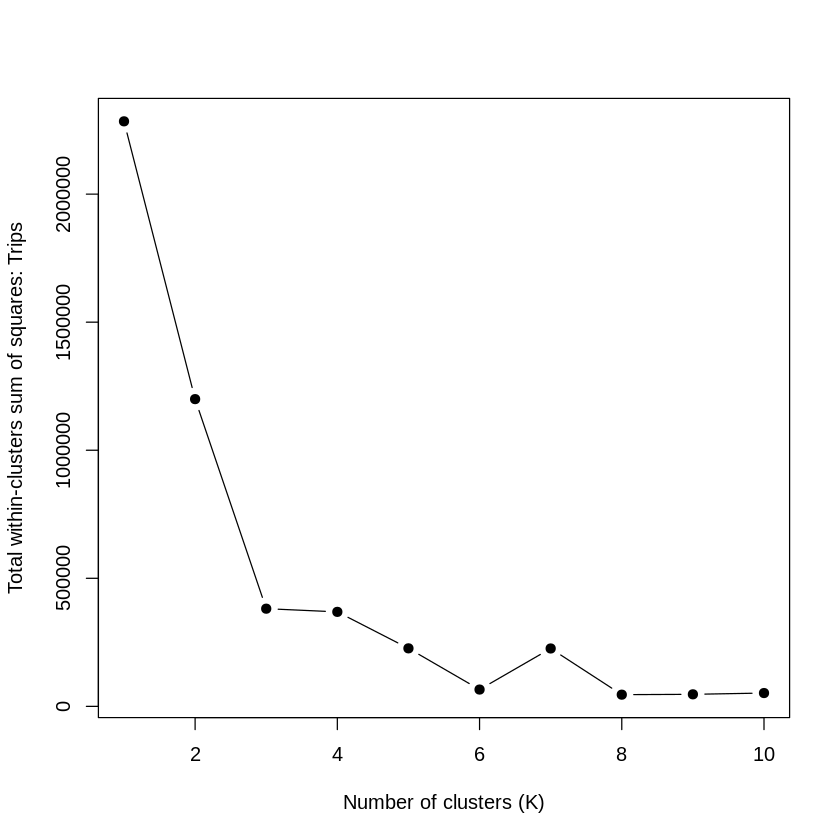

In [36]:
plot(1:k.max, wss, 
     type="b", pch=19,
     xlab = "Number of clusters (K)",
     ylab = "Total within-clusters sum of squares: Trips")

The elbo-point.. seems to be 3, hence that becomes the optimal point.<br/>
**Why shouldn't we take other ones like.. 4, 5, 6..??**
> _[May be..]_ we'll get too many clusters (probably may become difficult to make labellings to those clusterings)

![](resources/summary.png)

END